# Tutorial 3: Linear and nonlinear equations

## 1. Linear equations: Gauss-Seidel implementation to find missing data!

Linear equations are everywhere. 

In this exercise, we'll make use of the Gauss-Seidel method to find missing coefficients of a matrix, and we'll check our results graphically.

### Problem

Consider the following $5\times5$ matrix with $4$ missing terms ($M_{21}, M_{22}, M_{31}, M_{32}$):
$$ M = \begin{bmatrix}
10 & 20 & 30 & 40 & 50 \\
20 & 30 & 40 & 50 & 60 \\
30 & ? & ? & 60 & 70 \\
40 & ? & ? & 70 & 80 \\
50 & 60 & 70 & 80 & 90
\end{bmatrix}.
$$
Indexing starts from $0$. Now, how do we find them? 

To estimate the missing pixels values, we can use the **average of its neighboring pixels** as an approximate value. By doing that for each of them, we find the following $4$ linear equations:
$$ M_{21} = \frac{60+M_{22}+M_{31}}{4} $$
$$ M_{22} = \frac{100+M_{21}+M_{32}}{4} $$
$$ M_{31} = \frac{100+M_{21}+M_{32}}{4} $$
$$ M_{32} = \frac{140+M_{22}+M_{31}}{4}. $$
And this is a perfect scenario to use the Gauss-Seidel method to get estimates of them! :)

### Solution

#### Matrix with missing coefficients

In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the original matrix as
incomplete_matrix = np.array([
    [10, 20, 30, 40, 50],
    [20, 30, 40, 50, 60],
    [30, np.nan, np.nan, 60, 70],
    [40, np.nan, np.nan, 70, 80],
    [50, 60, 70, 80, 90]
])

Matrices are images!

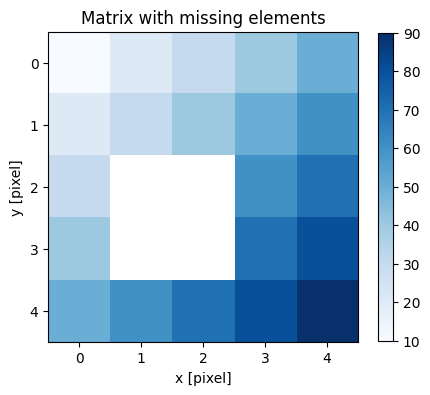

In [3]:
# And let's see it
plt.figure(figsize=(5,5))
plt.imshow(incomplete_matrix, cmap = 'Blues')
plt.colorbar(shrink = 0.8)
plt.title('Matrix with missing elements')
plt.xlabel('x [pixel]')
plt.ylabel('y [pixel]')
plt.show()

#### Gauss-Seidel method
Here we construct a function that adresses the problem.

In [4]:
# With a for loop
def get_missing_data(tolerance, m_guesses, max_iterations):
    """
    Obtains missing coefficients by using their neighbours. 
    Inputs: tolerance (float): parameter to determine convergence.
            m_guesses (array, float): array with initial guesses.
            max_iterations (int): maximum number of allowed iterations.
            
    Outputs: m_iterated (array, float): array containing final results.
    """
    # Initialize the convergence value to False
    convergence = False
    iteration = 0
    
    # Loop:
    for i in range(max_iterations):

        # Assign each missing element a more suggestive name
        m_21 = m_guesses[0]
        m_22 = m_guesses[1]
        m_31 = m_guesses[2]
        m_32 = m_guesses[3]
            
        # Define the equations for each (avg)
        m_21 = (60  + m_22 + m_31)/4
        m_22 = (100 + m_21 + m_32)/4
        m_31 = (100 + m_21 + m_32)/4
        m_32 = (140 + m_22 + m_31)/4

        # Store the new values
        m_iterated = np.array([m_21, m_22, m_31, m_32])

        # Check if the tolerance level has been reached
        #difference = np.sqrt(np.dot(m_iterated - m_guesses, m_iterated - m_guesses))

        difference = sum(abs(m_iterated - m_guesses))

        if difference < tolerance:
            convergence = True
            print('The tolerance level has been reached! :)')
            break

        # Assign the latest obtained values to be the new guesses
        m_guesses = m_iterated

        # Count the iteration
        iteration = iteration + 1
        
    # If tolerance level was not achieved, tell to increase the number of max iterations
    if not convergence:
        print('Process did not converge :(. Try increasing the number of maximum iterations.')

    return m_iterated, iteration

In [5]:
# With a while loop
def get_missing_data_while(tolerance, m_guesses):
    """
    Obtains missing coefficients by using their neighbours. 
    Inputs: tolerance (float): parameter to determine convergence.
            m_guesses (array, float): array with initial guesses.
            max_iterations (int): maximum number of allowed iterations.
            
    Outputs: m_iterated (array, float): array containing final results.
    """
    # Initialize the convergence value to False
    convergence = False
    iteration = 0

    difference = float('inf')
    
    # Loop:
    while difference > tolerance:

        # Assign each missing element a more suggestive name
        m_21 = m_guesses[0]
        m_22 = m_guesses[1]
        m_31 = m_guesses[2]
        m_32 = m_guesses[3]
            
        # Define the equations for each (avg)
        m_21 = (60  + m_22 + m_31)/4
        m_22 = (100 + m_21 + m_32)/4
        m_31 = (100 + m_21 + m_32)/4
        m_32 = (140 + m_22 + m_31)/4

        # Store the new values
        m_iterated = np.array([m_21, m_22, m_31, m_32])

        # Check if the tolerance level has been reached
        #difference = np.sqrt(np.dot(m_iterated - m_guesses, m_iterated - m_guesses))

        difference = sum(abs(m_iterated - m_guesses))

        if difference < tolerance:
            convergence = True
            break

        # Assign the latest obtained values to be the new guesses
        m_guesses = m_iterated

        # Count the iteration
        iteration = iteration + 1

    return m_iterated, iteration

In [6]:
# Tolerance
tolerance = 1e-8

# Initial (very bad) guesses
m_21 = 30**40
m_22 = 40**30
m_31 = 70**65
m_32 = -75

m_array = np.array([m_21, m_22, m_31, m_32]) 

In [7]:
# Call the function (while loop)
missing_elements, iterations = get_missing_data_while(tolerance, m_array)
print(f'The number of iterations was {iterations}.')

The number of iterations was 213.


#### Matrix with the found coefficients
Let's check if they values are correct.

In [8]:
# Relabel each
m_21 = missing_elements[0]
m_22 = missing_elements[1]
m_31 = missing_elements[2]
m_32 = missing_elements[3]

# And plug them into the matrix!
matrix = np.array([
    [10, 20, 30, 40, 50],
    [20, 30, 40, 50, 60],
    [30, m_21, m_22, 60, 70],
    [40, m_31, m_32, 70, 80],
    [50, 60, 70, 80, 90]
])

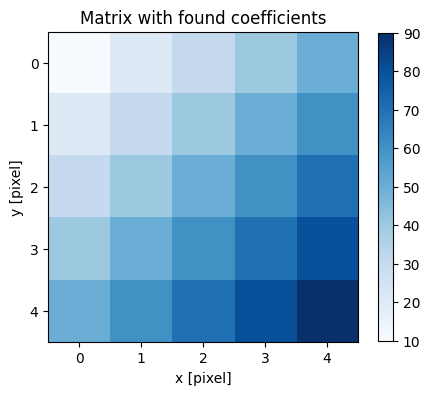

In [9]:
# Finally plot
plt.figure(figsize=(5,5))
plt.imshow(matrix, cmap = 'Blues')
plt.colorbar(shrink = 0.8)
plt.title('Matrix with found coefficients')
plt.xlabel('x [pixel]')
plt.ylabel('y [pixel]')
plt.show()

The result is perfect!

In [10]:
print(missing_elements)

[40. 50. 50. 60.]


## 2. Nonlinear equations: Points of possible collision with Bennu!

Bennu is an asteroid that was discovered in $1999$ by LINEAR Project. It also orbits the sun, and there's a small chance (there is!) of collision with Earth in the years $2135$ and $2182$. Here, we're going to find the points of intersection of the orbits.

### Problem

Given the eccentricity of Bennu's orbit, $e = 0.204$, and the semi-major axis, $a = 1.13\,\text{au}$: 

(a) Find the expression for the asteroid's orbit.

(b) Find the points of intersection with Earth's orbit (assume it's circular).

(c) Make a plot with the Sun at the center, the two orbits around it and also indicate the points of intersection.

### Solution

#### (a) Find the elliptical expression for the asteroid.

The expression for an ellipse with center $(h, k)$ is
$$
\left(\frac{x-h}{a}\right)^{2}+\left(\frac{y-k}{b}\right)^{2}=1,
$$
and the eccentricity allows us to get $b$ (semi-minor axis) as follows
$$
e = \sqrt{1-\frac{b^{2}}{a^{2}}} \implies b = \sqrt{a^{2}(1-e^{2})}.
$$

In principle, we need $b$, $h$ and $k$, but since Earth's orbit can be taken as a circle with respect to the sun, the expression for the asteroid can be reduced to
$$
\left(\frac{x-c}{a}\right)^{2}+\left(\frac{y}{b}\right)^{2}=1, \text{ where } c = ae.
$$

Now, let's obtain them!

In [11]:
# Function for b
def get_b(a, e):
    return np.sqrt(a**2*(1-e**2))

In [12]:
# Define parameters
a = 1.13 # au
e = 0.204

# And call the function
b = get_b(a, e)

In [13]:
# Simply compute c 
c = a*e

#### (b) Find the points of intersection with Earth's orbit (assume it's circular).

We do not need to solve for $x$ and $y$ at the same time; we can just solve for one of them and then replace the result to get the other value. 

Since we'll solve for $x$, the equations are
$$
y_{\text{E}} = \sqrt{1-x^{2}}
$$
$$
y_{\text{B}} = b\sqrt{1-\left(\frac{x-c}{a}\right)^{2}}.
$$

In [14]:
# Libraries
import sympy as sp
from sympy.solvers import solve

In [15]:
# Define symbols
x = sp.symbols('x')

In [16]:
# Define equations
y_circle = sp.sqrt(1-x**2)
y_ellipse = b*sp.sqrt(1-((x-c)/a)**2)

In [17]:
# And simply solve them
solution_x = solve(y_circle - y_ellipse, x)
x_int = float(solution_x[1])

We take the second element in the solution because the first one returns imaginary numbers.

In [18]:
# Now get the value in y
y_int = np.sqrt(1-x_int**2)

In [19]:
# Printing
print(f'The solutions are ({x_int}, +/-{y_int}).')

The solutions are (-0.4067349019607811, +/-0.9135462328349637).


#### (c) Make a plot with the Sun at the center, the two orbits around it and also indicate the points of intersection.
When having to plot, working with parametric equations is easier.

In [20]:
# Temporal array
t_array = np.linspace(0, 2*np.pi, 1000)

In [21]:
# Feed the parametric equations
# Bennu:
x_bennu = a*np.cos(t_array) + c
y_bennu = b*np.sin(t_array)

# Earth:
x_earth = np.cos(t_array)
y_earth = np.sin(t_array)

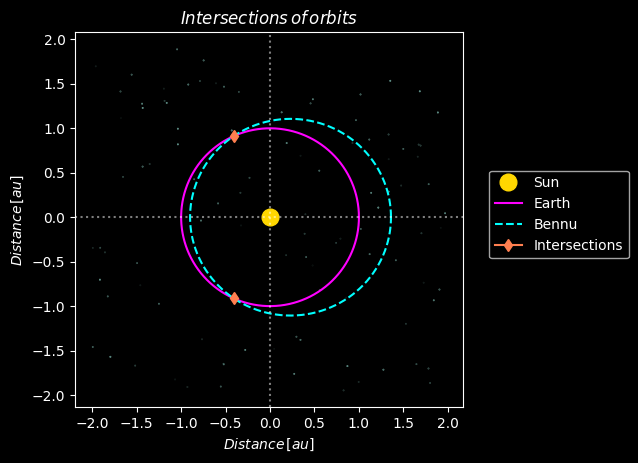

In [22]:
# Plotting
with plt.style.context('dark_background'):

    plt.figure(figsize=(5, 5))

    # Orbits and the sun
    plt.plot(0, 0, 'o', color='#FFD700', markersize=12, label='Sun')
    plt.plot(x_earth, y_earth, label = 'Earth', color='#FF00FF')
    plt.plot(x_bennu, y_bennu, label='Bennu', color='#00FFFF', linestyle = '--')
    
    # Intersections
    plt.plot(x_int, y_int, marker = 'd', color = '#FF7F50')
    plt.plot(x_int, -y_int, marker = 'd', color = '#FF7F50', label = 'Intersections')
    
    # Stars!
    np.random.seed(212)
    stars_x = np.random.uniform(-2, 2, 100)
    stars_y = np.random.uniform(-2, 2, 100)
    brigthness = np.random.uniform(0.1, 1, 100)
    
    plt.scatter(stars_x, stars_y, marker = '.', s = 0.5, alpha = brigthness)
    
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.title(r'$Intersections\, of\, orbits$', color = 'white')
    plt.xlabel(r'$Distance\, [au]$')
    plt.ylabel(r'$Distance\, [au]$')
    
    plt.axhline(0, color = 'white', linestyle = ':', alpha = 0.5)
    plt.axvline(0, color = 'white', linestyle = ':', alpha = 0.5)
    
    plt.legend(bbox_to_anchor = (1.05, 0.65))
    
    plt.show()